# Julia Academy

# 2. First Steps with DataFrames.jl

**Bogumił Kamiński**

**Source:** https://github.com/JuliaAcademy/DataFrames/blob/main/2.%20First%20steps%20with%20data%20frames.ipynb

### Anscombe's Quartet Plot

Anscombe's Quartet is a set of 4 datasets which despite having differently distributed data, they produce the same linear regression.

![Anscombe's quartet](https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg)

(from: https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg)


First let's use the required packages:


In [1]:
using DataFrames
using Statistics
using PyPlot
using GLM

We will store the data in the following matrix in which the columns represent $x_1$, $y_1$, $x_2$, $y_2$, ..., $y_4$.

In [2]:
aq = [10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
      14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
       4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.50 
      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
       5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89];

In [3]:
df = DataFrame(aq, :auto)


,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Now we can replace the automatically generated column names matching the $x_i, y_i \quad \forall \quad i \ = 1...4$

In [4]:
newnames = vec(string.(["x", "y"], [1 2 3 4]))
println(newnames)

["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]


Now we will modify the dataframe in place:

In [5]:
rename!(df, newnames)

,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


We can use the column names to extract vectors from the dataframe:

In [6]:
df.y1

11-element Array{Float64,1}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

Alternatively we can use array-style indexing:

In [7]:
df[:, "y1"]

11-element Array{Float64,1}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

Or if we want to express $y1$ symbolically:

In [8]:
df[:, :y1]

11-element Array{Float64,1}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

Suppose we wanted to select all the x-columns. We can use the `select` function with a regular expression. We can use the `:` symbol to select all the remaining columns which in this case will be the y-columns. This will have the effect of reordering the columns as : $x_1,\ ...\ ,\ x_4,\ y_1,\ ...\ ,\ y_4$. We will modify the dataframe in place for now:

In [9]:
select!(df, r"x", :)

,x1,x2,x3,x4,y1,y2,y3,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


## Summarizing a Dataframe

We can summarize a dataframe using the `describe` function. A key feature of Anscombe's quartet is that all the $x$ and $y$ variables have the same mean and variance:

In [10]:
describe(df, mean => "mean", std => "std") 

,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


We can easily get the number of rows and columns:

In [11]:
nrow(df)

11

In [12]:
ncol(df)

8

Let's create an "ID" column to use as an index:

In [13]:
df."id" = 1:nrow(df)
df


,x1,x2,x3,x4,y1,y2,y3,y4,id
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58,1
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76,2
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71,3
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84,4
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47,5
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04,6
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25,7
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5,8
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56,9


And now we can easily move the `"id"` column to the front using `select!`: 

In [14]:
select!(df, "id", :)

,id,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


Btw we can convert a dataframe back to a matrix using the `Matrix` constructor:

In [15]:
Matrix(df)

11×9 Array{Float64,2}:
  1.0  10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58
  2.0   8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76
  3.0  13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71
  4.0   9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84
  5.0  11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47
  6.0  14.0  14.0  14.0   8.0   9.96  8.1    8.84   7.04
  7.0   6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25
  8.0   4.0   4.0   4.0  19.0   4.26  3.1    5.39  12.5
  9.0  12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56
 10.0   7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91
 11.0   5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89

This conversion can be convenient for performing computations on the data using array operations. For example to produce the plots we will want to ensure that each plot has the same x and y limits regardless of the dataset. We can easily do this by calling the `extrema` function on a matrix representation of the x and y columns:

In [16]:
xlims = collect( extrema(Matrix(select(df, r"x"))) .+ (-1, 1) )

2-element Array{Float64,1}:
  3.0
 20.0

In [17]:
ylims = collect( extrema(Matrix(select(df, r"y"))) .+ (-1, 1) )


2-element Array{Float64,1}:
  2.1
 13.74

## Reproduction of Plots

We will use the `GLM` package to fit the regression lines. We will shot that the coefficients are identical for every regression model:

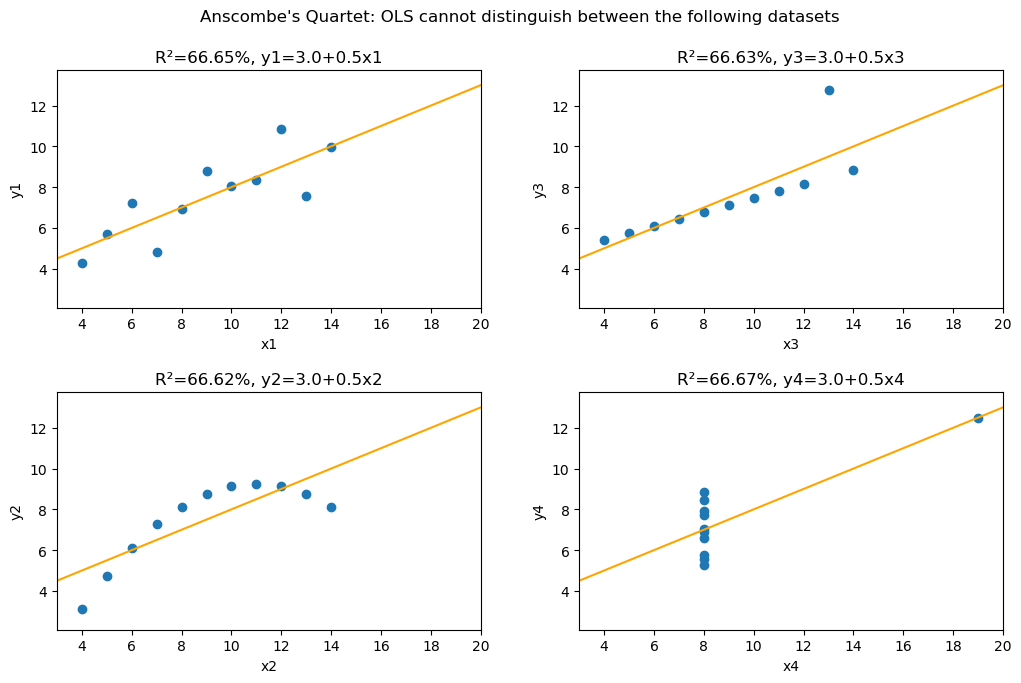

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7))
fig.tight_layout(pad=4.0)

for i in 1:4
    ax = axs[i]
    x = Symbol("x", i)
    y = Symbol("y", i)

    model = lm(term(y) ~ term(x), df)
    # plot model between the limits
    ax.plot(xlims, predict(model, DataFrame(x => xlims)), color="orange")
    # plot regression data
    ax.scatter(df[:, x], df[:, y])
    # formatting
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel("x$i")
    ax.set_ylabel("y$i")

    # get coefficients
    a, b = round.(coef(model), digits=2)
    r2_ = round(100 * r2(model), digits=2)
    ax.set_title(string("R²=$r2_%, $y=$a+$b$x"))
end

fig.suptitle("Anscombe's Quartet: OLS cannot distinguish between the following datasets", y=1);




## Some basic princples:

We can create a dataframe by passing pairs of Julia variables:

In [19]:
x = :var1
y = :var2
x_vals = 1:3
y_vals = 4:6
DataFrame(x => x_vals, y => y_vals)

,var1,var2
,Int64,Int64
1,1,4
2,2,5
3,3,6


Note the difference between "reading" data stored in a dataframe versus "accessing":

In [20]:
# using this notation we can only read the values:
df.x1

11-element Array{Float64,1}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [21]:
# using this notation the column itself is copied in memory
df[:, :x1]  # ~ copy(df.x1)

11-element Array{Float64,1}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

What if we want to select a column without copying it but want to use a variable holding its name? For this we can use the bang (`!`) operator as a special row selector:

In [22]:
n = :x1


:x1

In [23]:
df.x1 === df[:, n]

false

In [24]:
v = df[!, n]

11-element Array{Float64,1}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [25]:
df.x1 === v

true